# Classification of Breast Cancer Diagnosis

This project demonstrates the application of various machine learning models to classify breast cancer diagnosis based on a dataset. We'll walk through loading the data, preprocessing, training, and evaluating different classifiers.

In [82]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Loading and Exploring the Dataset
We start by loading the dataset using Pandas. The `head()` function is used to display the first few rows, helping us understand the structure of the data. We also check the column names and unique values in the 'diagnosis' column.

In [83]:
# Loading the dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [84]:
# Checking the column names in the dataset
dataset.columns

# Extracting unique values from the 'diagnosis' column to see the classification labels
set1 = set(dataset['diagnosis '])
print(set1)

{'M         ', 'B         '}


## 2. Data Preprocessing
The 'diagnosis' column contains categorical values 'M' (Malignant) and 'B' (Benign). We map these to binary values, where 'M' becomes 1 and 'B' becomes 0. This conversion is essential for training machine learning models.

In [85]:
# Mapping the 'diagnosis' column to binary values: M (Malignant) -> 1, B (Benign) -> 0
dataset['diagnosis '] = dataset['diagnosis '].map({'M         ': 1,'B         ': 0}).astype(int)
print(dataset.head())

   id          diagnosis   radius_mean   texture_mean   perimeter_mean   \
0      842302           1         17.99          10.38           122.80   
1      842517           1         20.57          17.77           132.90   
2    84300903           1         19.69          21.25           130.00   
3    84348301           1         11.42          20.38            77.58   
4    84358402           1         20.29          14.34           135.10   

   area_mean   smoothness_mean   compactness_mean   concavity_mean   \
0      1001.0           0.11840            0.27760           0.3001   
1      1326.0           0.08474            0.07864           0.0869   
2      1203.0           0.10960            0.15990           0.1974   
3       386.1           0.14250            0.28390           0.2414   
4      1297.0           0.10030            0.13280           0.1980   

   concave_points_mean   ...  radius_worst   texture_worst   perimeter_worst   \
0               0.14710  ...          25.

## 3. Splitting the Data
The dataset is split into features (x) and target labels (y). We use the `train_test_split` function to divide the data into training and testing sets, with 80% of the data used for training and 20% for testing.

In [86]:
from sklearn.model_selection import train_test_split
x = dataset.iloc[:, 2:].values # All columns except the first two are features
y = dataset.iloc[:, 1].values  # The second column (diagnosis) is the target label
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


## 4. Model Selection and Evaluation
We import several classifiers, including Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, and Linear Discriminant Analysis. These models are evaluated using 10-fold cross-validation to ensure robustness.


In [87]:
# Importing various machine learning models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Importing metrics to evaluate model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

### Cross-Validation
Cross-validation is a technique used to assess the generalizability of a model. Here, we use Stratified K-Fold cross-validation, which ensures that each fold of the dataset maintains the same class distribution as the original data.

In [88]:
# Importing the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Creating a list of models to evaluate
models = []
models.append(('LDA', LDA()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

## 5. Model Performance Visualization
The mean accuracy of each model is plotted using a bar chart. This visual representation allows us to compare the performance of different classifiers easily.

LDA: 0.956087
LR: 0.978068
KNN: 0.964879
SVC: 0.975894
DT: 0.920918
RF: 0.962657
NB: 0.949565


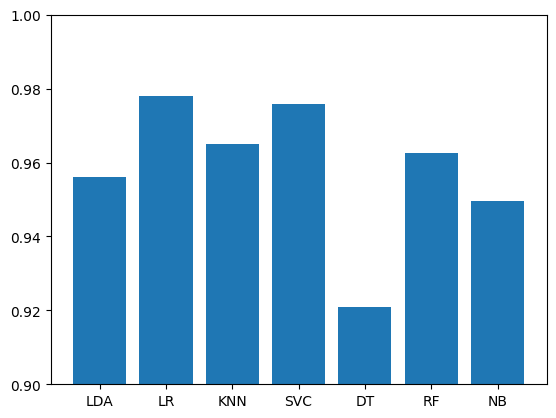

In [89]:
# Initializing lists to store results
results = []
names = []
res = []

for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  res.append(cv_results.mean())
  msg = "%s: %f" % (name, cv_results.mean())
  print(msg)

# Plotting the accuracy of each model
plt.ylim(0.90 , 1.00)
plt.bar(names, res)
plt.show()


## 6. Training and Testing with SupportVectorClassifier
Finally, we select the SupportVectorClassifier, train it on the training data, and test it on the test data. We calculate the accuracy of the model on the test data and print the result.

In [90]:
# Fitting the RandomForestClassifier to the training data
model = SVC()
model.fit(x_train, y_train)

# Making predictions on the test data
predictions = model.predict(x_test)

# Calculating and printing the accuracy of the model
final1 = accuracy_score(y_test, predictions)*100
print(f"Accuracy : {final1.round(2)}")


Accuracy : 98.25


### `Github : hellopavi`